In [1]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

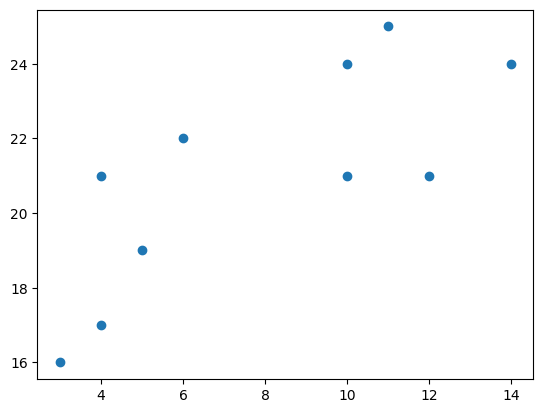

In [2]:
plt.scatter(x, y)
plt.show();

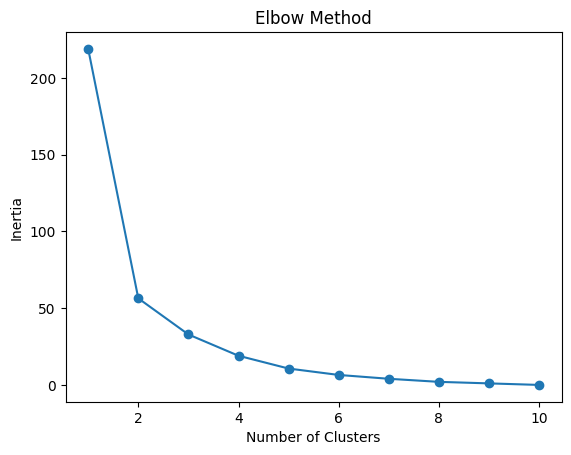

In [5]:
from sklearn.cluster import KMeans

data = list(zip(x, y))

inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show();

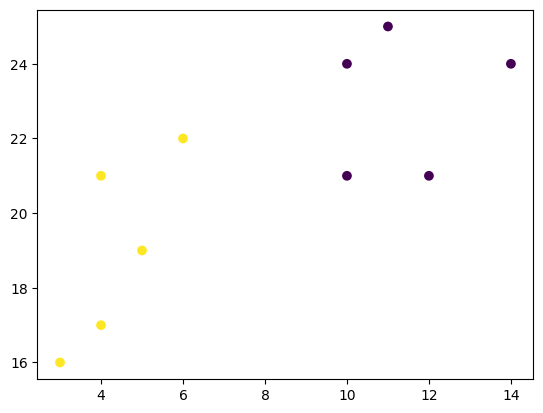

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show();

## Bootstrap Aggregator

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [13]:
data = datasets.load_wine(as_frame=True)
print(data)

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  pro

In [14]:
X = data.data
y = data.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = dtree.predict(X_test)

print("Train data Accuracy:", accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data Accuracy:", accuracy_score(y_true = y_test, y_pred=y_pred))

Train data Accuracy: 1.0
Test data Accuracy: 0.9555555555555556


[Text(0.5, 0.9, 'X[9] <= 3.82\ngini = 0.658\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(0.3, 0.7, 'X[12] <= 1010.0\ngini = 0.08\nsamples = 48\nvalue = [2, 46, 0]'),
 Text(0.2, 0.5, 'X[2] <= 3.07\ngini = 0.042\nsamples = 47\nvalue = [1, 46, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7, 0.7, 'X[6] <= 1.4\ngini = 0.57\nsamples = 85\nvalue = [42, 7, 36]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(0.8, 0.5, 'X[12] <= 724.5\ngini = 0.245\nsamples = 49\nvalue = [42, 7, 0]'),
 Text(0.7, 0.3, 'X[0] <= 13.145\ngini = 0.219\nsamples = 8\nvalue = [1, 7, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

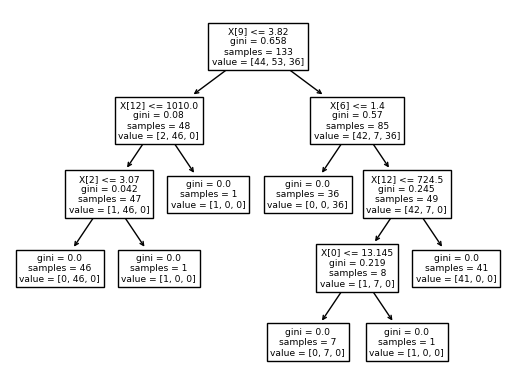

In [23]:
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
tree.plot_tree(dtree)

In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
estimator_range = [2,4,6,8,10,12,14,16]

In [26]:
models = []
scores =[]

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators=n_estimators, random_state=22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and scores to their respective lists
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

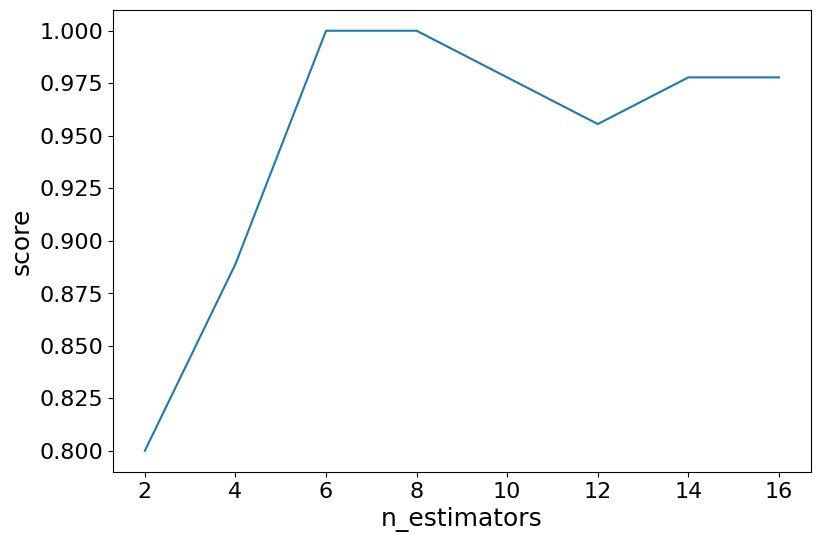

In [29]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine()

In [31]:
X = data.data
y = data.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [33]:
oob_model = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


In [34]:
from sklearn.tree import plot_tree

AttributeError: 'BaggingClassifier' object has no attribute 'tree_'

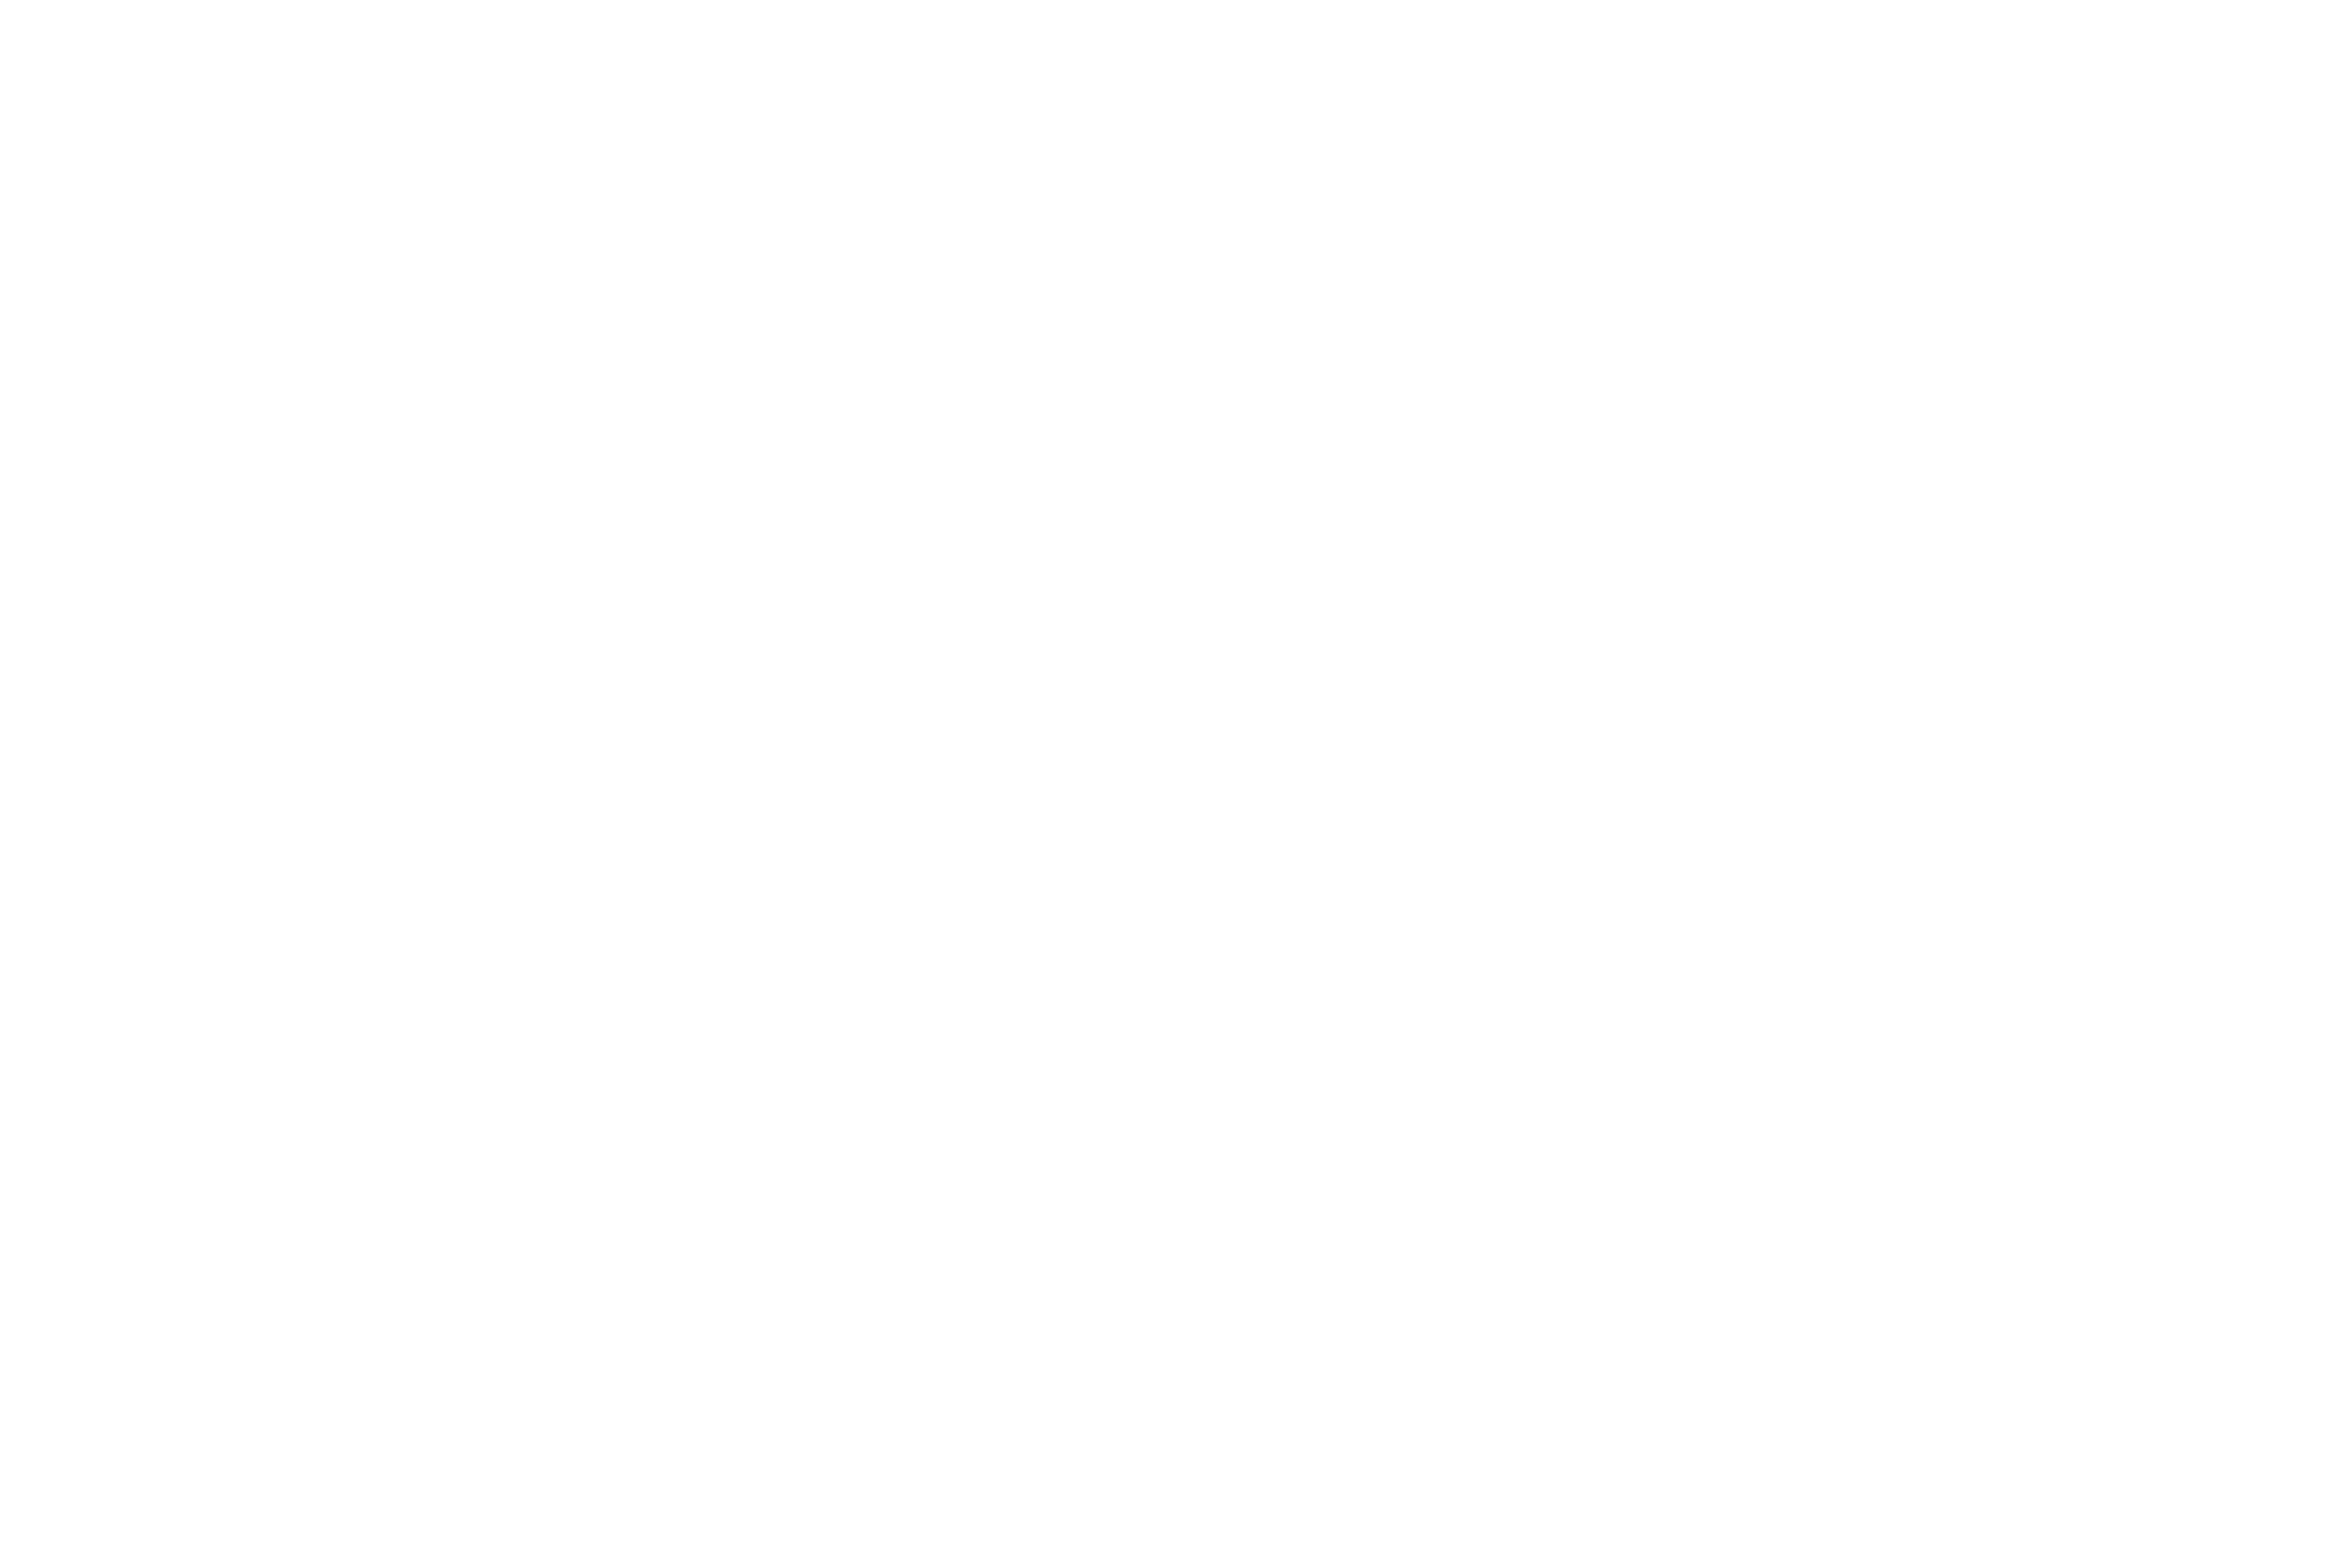

In [38]:
clf = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30,20))
